# PREDICTION USING DECISION TREE ALGORITHM

Importing important libraries and reading the csv file

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [60]:
df = pd.read_csv('Iris.csv')

In [61]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [63]:
df.shape

(150, 6)

In [64]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [65]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [66]:
df.drop('Id',axis = 1,inplace = True)

In [67]:
dataset = df

In [68]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

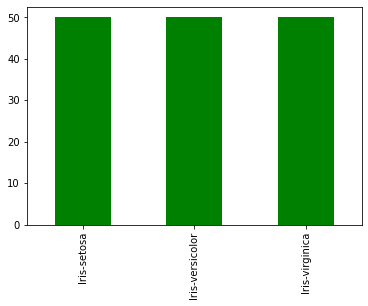

In [70]:
dataset['Species'].value_counts().plot(kind='bar',color='green')

## Label Encoding the species into numbers 

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()

In [73]:
dfle = dataset

In [74]:
dfle.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
dfle.Species = le.fit_transform(dfle.Species)

In [76]:
dfle.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
df0 = dfle[dfle.Species == 0]
df1 = dfle[dfle.Species == 1]
df2 = dfle[dfle.Species == 2]

In [78]:
df0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [80]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


## Data Visualization

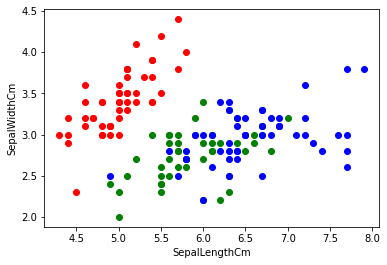

In [81]:
plt.scatter(df0['SepalLengthCm'],df0['SepalWidthCm'],color = 'red')
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color = 'green')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color = 'blue')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

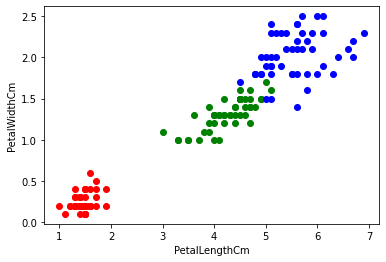

In [82]:
plt.scatter(df0['PetalLengthCm'],df0['PetalWidthCm'],color = 'red')
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color = 'green')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color = 'blue')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

## Train test split and using decision tree classfier

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [84]:
X = dfle.drop('Species',axis = 1)
y = dfle.Species

In [85]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [86]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [88]:
model = DecisionTreeClassifier()

In [89]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
model.score(X_test,y_test)

0.9666666666666667

In [91]:
model.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [92]:
model.predict([[3.4,2.3,1.6,0.5]])

array([0])

## Prediction Function 

In [98]:
def prediction(pl,pw,sl,sw):
    species = model.predict([[pl,pw,sl,sw]])
    print(species)

In [100]:
prediction(4.2,3.5,2.1,1.5)

[1]


## Visualization of the model accuracy 

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

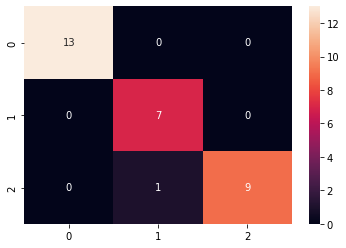

In [102]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot = True)